In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

Melakukan import modul yang akan digunakan, diantaranya Matplotlib untuk visualisasi data, dan fungsi-fungsi dari SciPy untuk pemrosesan sinyal. Selain itu, dilakukan juga konfigurasi font pada beberapa komponen dala keperluan plot

In [ ]:
N = 40
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

Code diatas menguji perbedaan antara hasil dari pendekatan yang berbeda dalam mengimplementasikan filter FIR dan IIR. Pertama, sebuah delta-function (impuls) diterapkan ke filter FIR dengan menggunakan koefisien b yang diisi dengan nilai satu dan koefisien a yang merupakan array satu. Kemudian, pendekatan kedua mengubah filter IIR menjadi bentuk rekursif dengan menetapkan koefisien b menjadi array yang berisi nilai satu pada indeks pertama dan nilai minus satu pada indeks terakhir, sementara koefisien a diisi dengan nilai satu dan minus satu. Hasil dari kedua pendekatan tersebut, y1 dan y2, dibandingkan untuk memverifikasi apakah keduanya menghasilkan sinyal yang sama. Hasil yang didapatkan adalah True

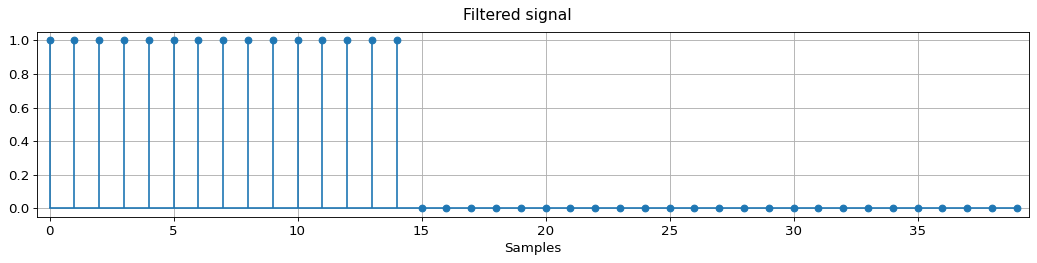

In [ ]:
plt.figure(figsize=(16, 3), dpi=80)
plt.stem(y2, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)


Plot diatas menunjukkan hasil dari filter FIR yang diimplementasikan dengan menggunakan fungsi stem, amplitudo dari sinyal output pada titik-titik diskrit ditampilkan dengan menggunakan ujung bulat. Plot tersebut memvisualisasikan sinyal output yang telah difilter dengan filter FIR f, dengan sumbu x yang menunjukkan jumlah sampel dan sumbu y yang menunjukkan amplitudo sinyal.

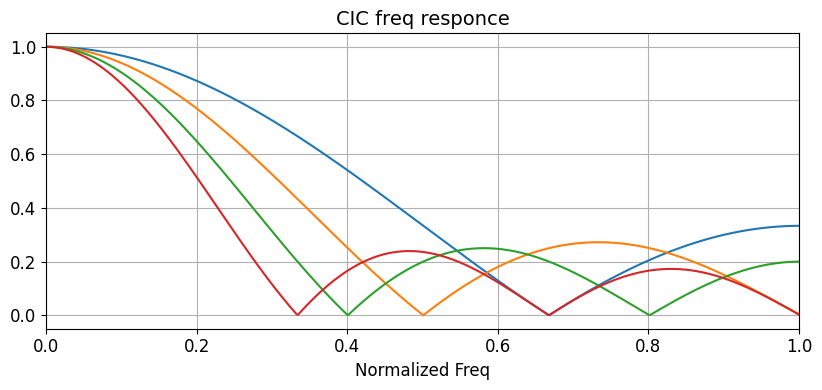

In [ ]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

Code diatas menampilkan plot respons frekuensi dari filter CIC (Cascaded Integrator-Comb) dengan panjang pipa integrator sebesar 3. Dalam loop, filter CIC digunakan untuk menyaring sinyal input dengan panjang pipa integrator bertambah pada setiap iterasi. Gambar yang dihasilkan menampilkan respons frekuensi normalisasi dari filter CIC untuk setiap panjang pipa integrator, yang dihitung sebagai magnitudo dari respons frekuensi yang dinormalisasi dengan nilai maksimumnya.

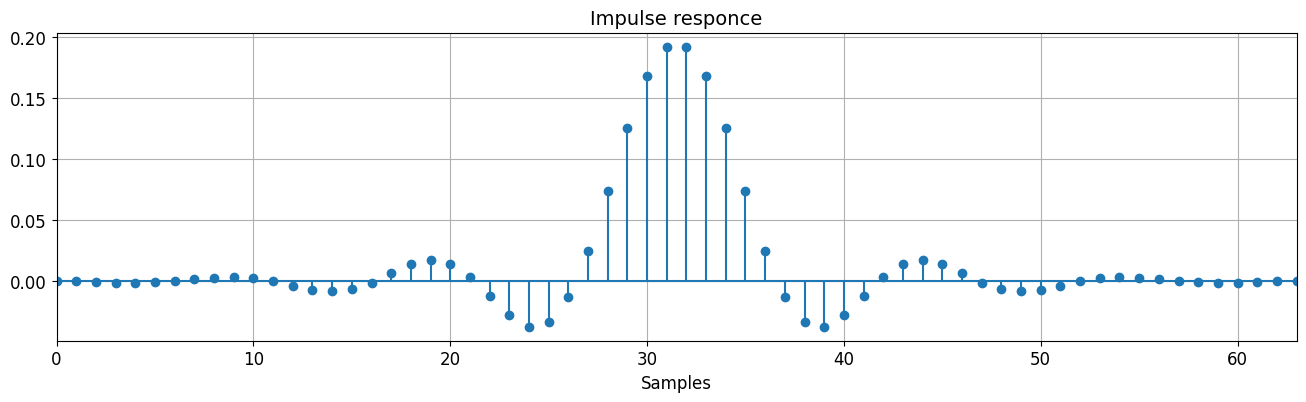

In [ ]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse responce')
plt.stem(taps, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Code diatas mendefinisikan dan memplot filter FIR menggunakan metode Parks-McClellan. Panjang filter FIR ditentukan sebagai 64, dan respons frekuensi yang diinginkan dijelaskan oleh dua array, yaitu lst_freqs yang berisi daftar frekuensi yang diinginkan dan lst_gain yang menentukan gain di setiap frekuensi. Plot menunjukkan respons impuls dari filter FIR yang dihasilkan, di mana nilai koefisien filter (taps) ditampilkan dalam bentuk lingkaran pada titik-titik diskrit

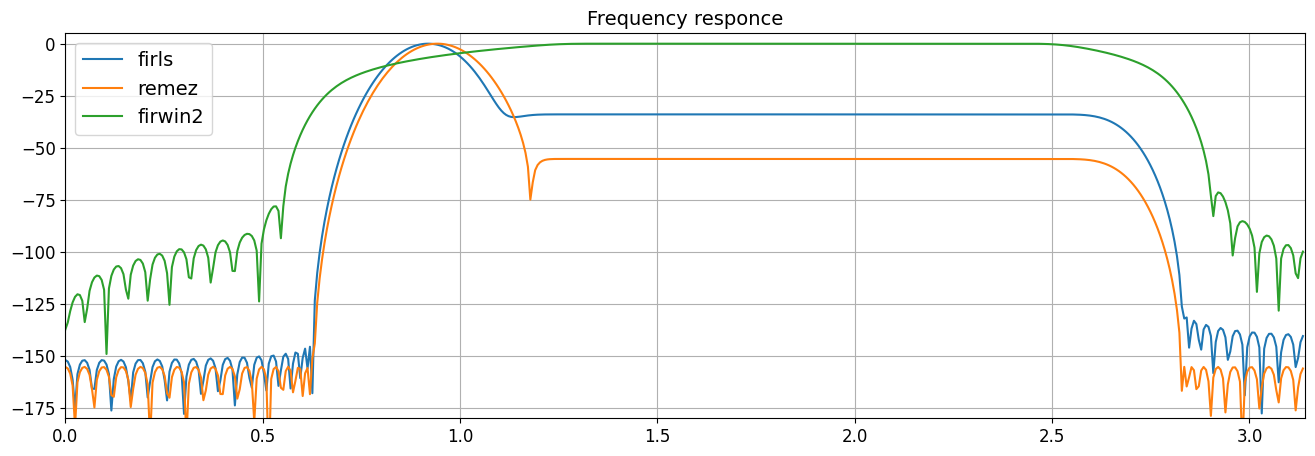

In [ ]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

code diatas menunjukan perbandingan respon frekuensi dari tiga filter FIR yang dirancang menggunakan metode berbeda yaitu Firls, Remez, dan Firwin2. Filter-filter tersebut dirancang untuk menyesuaikan karakteristik respon frekuensi 10, yang didefinisikan oleh parameter-parameter seperti panjang filter (N) senilai 100, target gain bernilai (0, 0, 1, 1, 0, 0) dan frekuensi-frekuensi band yang diinginkan bernilai (0, 1, 2, 4, 4.5, 5). Plot menampilkan respons frekuensi dari masing-masing filter dalam skala dB, di mana sumbu x menunjukkan frekuensi dalam rentang 0 hingga pi (folding frequency), sedangkan sumbu y menunjukkan gain dalam dB.

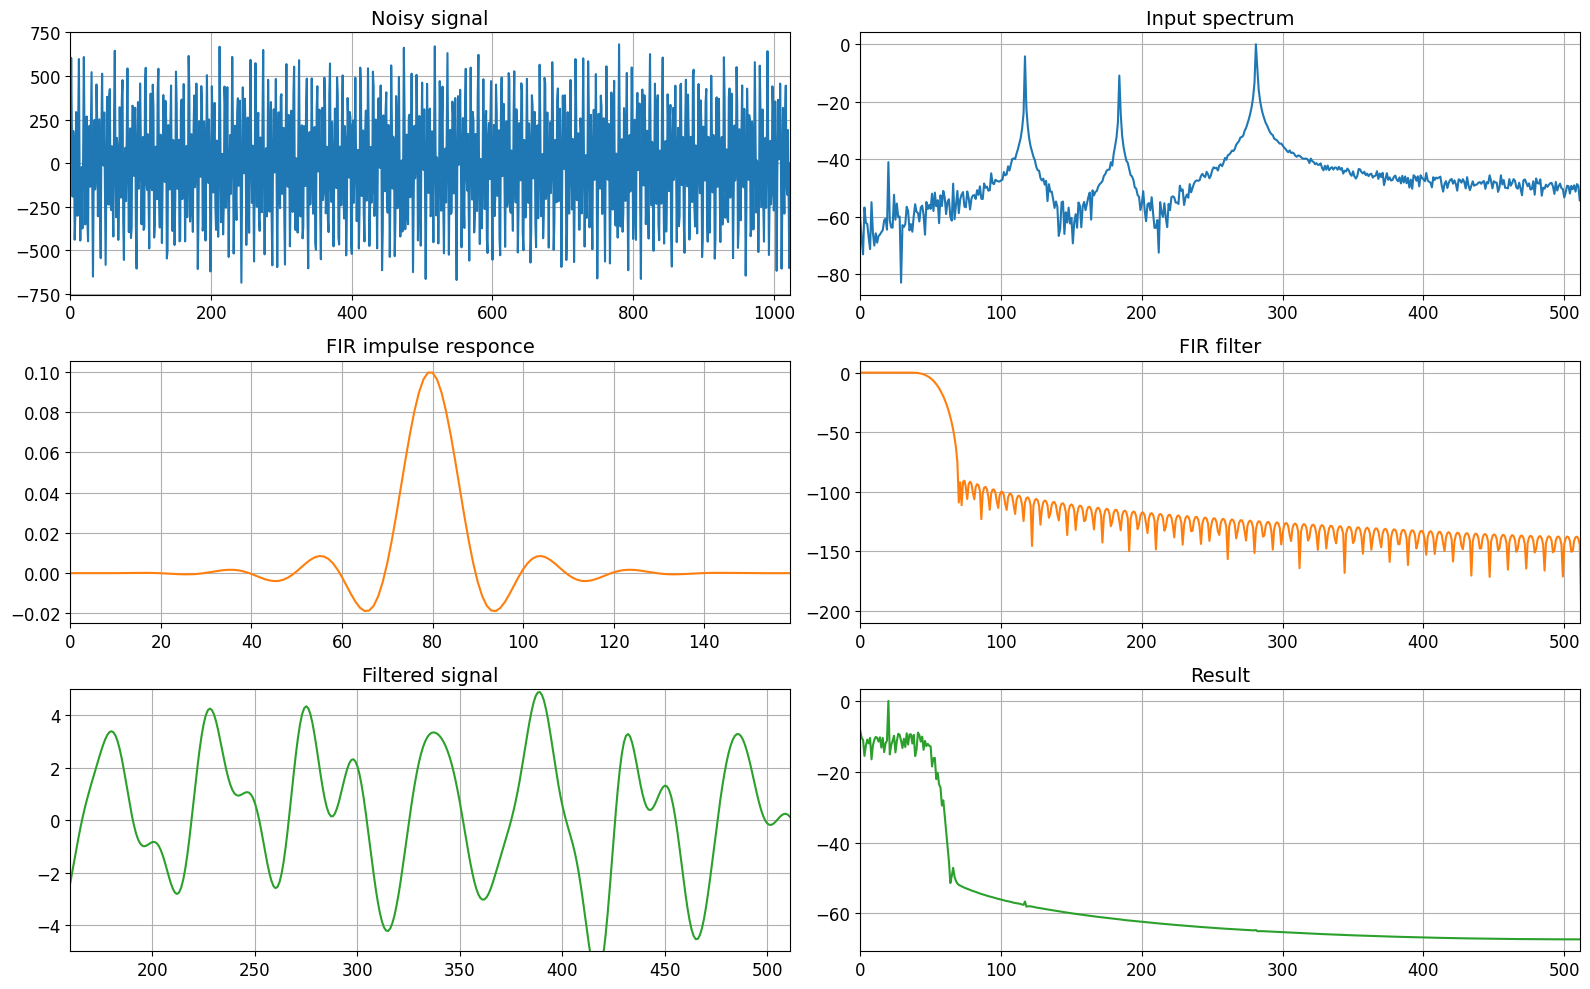

In [ ]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Code diatas menampilkan simulasi proses penghilangan noise dari sinyal menggunakan filter FIR. Sinyal input x terdiri dari beberapa komponen sinusoidal dengan tambahan white noise. Filter FIR dengan koefisien h dirancang menggunakan metode Kaiser dengan panjang filter 160. Sinyal input, respon impuls filter FIR, dan sinyal hasil filtrasi ditampilkan dalam subplot pertama, sedangkan FFT dari masing-masing sinyal tersebut ditampilkan dalam subplot kedua. Plot yang dihasilkan menunjukkan perbandingan antara sinyal asli, respons impuls filter FIR, dan sinyal hasil filtrasi, serta spektrum frekuensi masing-masing.